# Assigment 3: 

## Objective
Discover organizational structures in a dataset with unsupervised learning techniques

## Activities

1.  Discover  the  number  of  groups  present  in  the  data  or  a  reliable  range  of  possible  values.   Do  some
experiments in this regard.
2.  Analyze the medoids of some groups (for example, 3 groups) and their closest neighbors in the groups.
Do they make sense?  Are they talking about the same type of documents?
3.  Think of possible ways of checking the validity/quality of your clusters.
4.  Re-do  the  best  experiment  above  considering  the  PCA  dimensionality  reduction.   Consider  different
energies  (variance)  to  cut  and  reduce  dimensionality.   What  are  the  conclusions  when  using  PCA  in
this problem?
5.  Prepare  a  4-page  (max.)  report  with  all  your  findings.  It  is  UP  TO  YOU  to  convince  the  reader  that
you are proficient on Unsupervised Learning Techniques, and the choices it entails

## imports

In [1]:
# import dependencies
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import matplotlib.pyplot as plt
import string
import re
from sklearn.feature_extraction import text
from sklearn.cluster import KMeans
from sklearn import metrics
import time

import os


In [2]:


print("Files on directory: ")
!unzip health-dataset.zip
!ls

Files on directory: 
Archive:  health-dataset.zip
   creating: health-dataset/
  inflating: health-dataset/bags.csv  
  inflating: health-dataset/word2vec.csv  
  inflating: health-dataset/health.txt  
2018-dongt	       README	  examples	      pymei.tar.gz
2018-dongt.tar.gz      anaconda2  health-dataset      src
Assigment3.ipynb       anaconda3  health-dataset.zip  tutorials
Nvidia_Cloud_EULA.pdf  certs	  pymei		      v


In [3]:
#load the health.txt
base_dir = 'health-dataset/'
names = ['id', 'publish_date', 'headline_text']
with open (base_dir + 'health.txt', 'rb') as csvfile:
  complete_tweet = pd.read_csv(base_dir + 'health.txt',
                               skiprows = 1,
                               header = None,
                               names = names,
                              delimiter = '|')
copy_tweet = complete_tweet.copy(deep=False)
print("complete_tweet.shape = ", complete_tweet.shape)


complete_tweet.shape =  (13229, 3)


## Process the text input

1. Remove punctuation (we will leave the # for now and see what happens)
2. Removing stop words — frequent words such as ”the”, ”is”, etc. that do not have specific semantic
3. Remove @ (they mean mention on Twitter)



In [4]:
def clean_data(pandas_data, column_name):
  #remove punctuation exect for # and @, they have meanings on Twitter
  blacklist = string.punctuation
  blacklist = blacklist.replace("#", "")
  blacklist = blacklist.replace("@", "")
  print('blacklist = ', blacklist)
  
  #remove punctuation
  pandas_data[column_name] = pandas_data[column_name].str.replace('[{}]'.format(blacklist), '')
  
  #remove digits
  pandas_data[column_name] = pandas_data[column_name].str.replace('\d+', '')
  
  #remove the references started with @
  pandas_data[column_name] = pandas_data[column_name].str.replace(r'@[A-Za-z0-9]+', '')
  
  #all to lowercase
  pandas_data[column_name] = [header.lower() for header in pandas_data[column_name]]
  
  #remove stop words
  stop = text.ENGLISH_STOP_WORDS
  complete_tweet['headline_text'] = complete_tweet['headline_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

    
  return pandas_data

complete_tweet = clean_data(complete_tweet,'headline_text')
complete_tweet
  

blacklist =  !"$%&'()*+,-./:;<=>?[\]^_`{|}~


,id,publish_date,headline_text
0,576880531301801984,Sat Mar 14 23:00:11 +0000 2015,abundance online info turn ehypochondriacs wor...
1,576820122666471424,Sat Mar 14 19:00:08 +0000 2015,plantbased diet incorporates fish key preventi...
2,576744652717461504,Sat Mar 14 14:00:15 +0000 2015,doesnt damage hearing sports bar nightclub tha...
3,576736754436304896,Sat Mar 14 13:28:52 +0000 2015,rt forever young discover island’s secrets lon...
4,576736614766010368,Sat Mar 14 13:28:18 +0000 2015,rt posttraumatic stress disorder genes simple ...
5,576548368740052992,Sat Mar 14 01:00:17 +0000 2015,maysoon zayid touring standup comic cerebral p...
6,576518190286536704,Fri Mar 13 23:00:22 +0000 2015,women wipe alzheimers
7,576494177971732480,Fri Mar 13 21:24:57 +0000 2015,rt women defeat #alzheimers says #wipeoutalz c...
8,576472874946433024,Fri Mar 13 20:00:18 +0000 2015,time raise legal smoking age
9,576464606551490560,Fri Mar 13 19:27:27 +0000 2015,cdc misuse garments led release bioterror bact...


## Create a bag of words

**text_counter:**  counts the frequency of each word.   Using [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)  
**dictionary**  : a pandas'  dataframe, with the name of the word (String) and the frequency of the worrd on the entire document.  
**processed_tfidf:** normalize the matriz penalizing the words that appears too much in the document. Using [TfidfTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer).

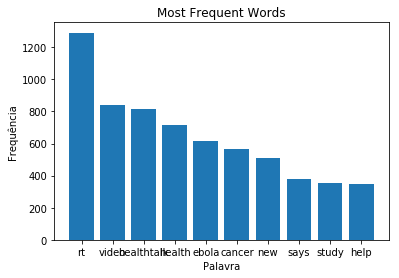

(13229, 11400)


{'norm': 'l2', 'smooth_idf': True, 'sublinear_tf': False, 'use_idf': True}

In [5]:
vectorizer = CountVectorizer(input = 'content', lowercase = True, analyzer = 'word',
                             token_pattern=r'\b[^\d\W]+\b')
text_counter = vectorizer.fit_transform(complete_tweet['headline_text'])

frequency = np.sum(text_counter.toarray(), axis = 0)
frequency = np.asarray(frequency, dtype = 'float32')
number_words = frequency.shape[0]
frequency = np.squeeze(frequency.reshape(number_words, 1))

feature_names = vectorizer.get_feature_names()
feature_names = np.asarray(feature_names)
feature_names = feature_names.reshape(number_words, 1)


dictionary = {'name': np.squeeze(feature_names), 'frequency': np.squeeze(frequency)}
dictionary = pd.DataFrame(data=dictionary)
dictionary = dictionary.sort_values('frequency',ascending = False)

tfidf_transformer = TfidfTransformer()
processed_tfidf = tfidf_transformer.fit_transform(text_counter)


#test
plt.title('Most Frequent Words')
plt.xlabel('Palavra')
plt.ylabel('Frequência')
plt.bar(np.asarray(dictionary['name'])[:10], np.asarray(dictionary['frequency'])[:10])
plt.show()

print(processed_tfidf.shape)
parameters = tfidf_transformer.get_params(deep=True)
parameters


##  Determining the number of centroids
Using K means
K means is very sensitive to the initialization,  in order to find the best  K with minimizing this effect, we will set the atribute  **n_init**  to be 10.  As defined in the documentation:  
**n_init** Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia."  
To make the experiments consistent, we will set a fixed random state, by choosing a fixed value to  **random_state**. As defined in the documentation:  
Determines random number generation for centroid initialization. Use an int to make the randomness deterministic.  
[See Details].(http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In the section bellow we will run the k-means algorithm to find the "elbow" that will give us the best k. We will take some metrics as well, the main is the silhouette coefficient, that measues how well each element lies within it's cluster.

In [6]:
def perform_kmeans(processed_tfidf, range_kmeans):
  sum_of_squares = []
  silhouettes = []

  tic  = time.time()
  j = 0
  for i in range(range_kmeans[0],range_kmeans[1],range_kmeans[2]):
    km = KMeans(n_clusters= i,n_init = 10, random_state = 42)
    km.fit(processed_tfidf)
    sum_of_squares.append(km.inertia_ )
    silhouettes.append(metrics.silhouette_score(processed_tfidf, km.labels_, sample_size=1000))
    j+=1
    print('\rIteration', j , end = '')
  toc = time.time()
  print('Time elapsed: ', toc - tic)
  return (km, sum_of_squares, silhouettes)

Iteration 3Time elapsed:  18.470991134643555


Text(0,0.5,'inertia')

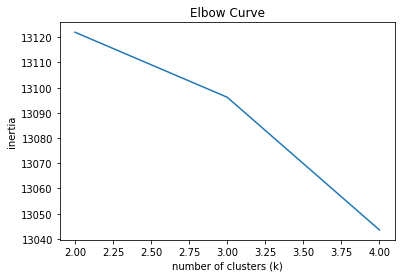

In [7]:
km, sum_squares, silhouettes = perform_kmeans(processed_tfidf, (2, 5, 1))
plt.plot(range(2,5,1),sum_squares)
plt.title("Elbow Curve")
plt.xlabel('number of clusters (k)')
plt.ylabel('inertia')

(13229, 11400)


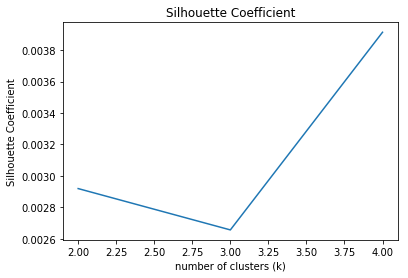

In [8]:
plt.plot(range(2,5,1),silhouettes)
plt.title("Silhouette Coefficient")
plt.xlabel('number of clusters (k)')
plt.ylabel('Silhouette Coefficient')
print(processed_tfidf.shape)

##  Visualizing the Clusters
Choosing k = 150

In [9]:
km = KMeans(n_clusters = 2 ,n_init = 10, random_state = 42)
label_vectors = km.fit_predict(processed_tfidf)
print('inertia = ', km.inertia_)
print('silhouette coef = ', metrics.silhouette_score(processed_tfidf, km.labels_, sample_size=1000))


inertia =  13121.99285908534
silhouette coef =  0.0021828050957039755


In [10]:
num_samples = complete_tweet.shape[0]
for i in range(num_samples):
  if(label_vectors[i] == 2):
    print(copy_tweet['headline_text'][i])
    print()

## List the most frequent word of each cluster

In [11]:
main_words = np.argmax(km.cluster_centers_, axis = 1)
print(dictionary['name'][main_words])

8579        rt
10837    video
Name: name, dtype: object


# Applying  PCA to reduce dimensionality

In [13]:
from sklearn.decomposition import PCA, TruncatedSVD

ti = time.time()
svd = TruncatedSVD(n_components=2, n_iter=5)
truc_data = svd.fit_transform(processed_tfidf)
tf = time.time()

print('tempo do svd' ,tf - ti)
# print(svd.explained_variance_ratio_)  
print(svd.explained_variance_ratio_.sum())  
# print(svd.singular_values_) 

tempo do svd 0.09392404556274414
0.007553097548765352


## Apply k-means with lower dimensionality

Iteration 3Time elapsed:  0.5346624851226807


Text(0,0.5,'inertia')

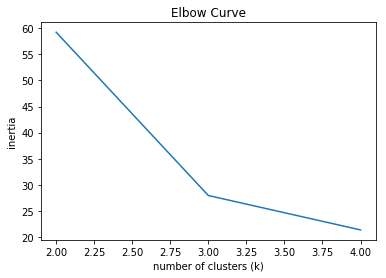

In [14]:
rng = (2, 5, 1)

km, sum_squares, sih = perform_kmeans(truc_data, rng)

plt.plot(range(rng[0], rng[1], rng[2]), sum_squares)
plt.title("Elbow Curve")
plt.xlabel('number of clusters (k)')
plt.ylabel('inertia')

Text(0,0.5,'Silhouette Coefficient')

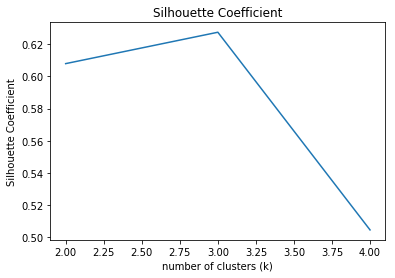

In [15]:
plt.plot(range(rng[0], rng[1], rng[2]),sih)
plt.title("Silhouette Coefficient")
plt.xlabel('number of clusters (k)')
plt.ylabel('Silhouette Coefficient')

In [16]:
km = KMeans(n_clusters = 2 ,n_init = 10, random_state = 42)
label_vectors = km.fit_predict(truc_data)
print('inertia = ', km.inertia_)
print('silhouette coef = ', metrics.silhouette_score(truc_data, km.labels_, sample_size=1000))

print(processed_tfidf.shape)
print(label_vectors)
# print(processed_tfidf.get_feature_names())
print(vectorizer.get_feature_names())
print(complete_tweet.shape)


inertia =  59.230725751870885
silhouette coef =  0.6081236504337081
(13229, 11400)
[0 0 0 ... 0 1 0]
['a', 'aaand', 'aampc', 'aampe', 'aampes', 'aap', 'aaron', 'ab', 'aback', 'abandon', 'abandoned', 'abandoning', 'abating', 'abbvie', 'abcs', 'abdomen', 'abduction', 'aberdeen', 'abilities', 'ability', 'abiltity', 'able', 'aboard', 'abort', 'aborted', 'abortion', 'abortions', 'aboth', 'abroad', 'abs', 'abscesses', 'absences', 'absent', 'absolute', 'absolutely', 'absorbed', 'abstain', 'abstaining', 'abstinence', 'abt', 'abundance', 'abuse', 'abused', 'abusedeterrent', 'abusing', 'abusive', 'aby', 'ac', 'aca', 'academic', 'acai', 'accent', 'accept', 'acceptance', 'accepted', 'accepting', 'access', 'accesses', 'accessible', 'accessory', 'accident', 'accidental', 'accidentally', 'accidents', 'accompany', 'accomplice', 'accomplish', 'accomplished', 'according', 'account', 'accountability', 'accountable', 'accounts', 'accuracy', 'accurate', 'accuse', 'accused', 'accutane', 'acetaminophen', 'ac

## Visualize the results

In [17]:
num_samples = complete_tweet.shape[0]
for i in range(num_samples):
  if(label_vectors[i] == 11):
    print(copy_tweet['headline_text'][i])
    print()

In [18]:
main_words = np.argmax(km.cluster_centers_, axis = 1)
print(dictionary['name'][main_words])

0    a
0    a
Name: name, dtype: object


## DBSCAN

In [19]:
from sklearn.cluster import DBSCAN

ti = time.time()
dbs = DBSCAN(eps=1.2, min_samples=51)
dbs_clust = dbs.fit(processed_tfidf)
tf = time.time()
print('tempo do dbs' ,tf - ti)

tempo do dbs 1.4194231033325195


In [20]:
label_vectors = dbs_clust.fit_predict(processed_tfidf)
num_clusters = np.argmax(label_vectors)
print('number of clusters: ', num_clusters)
print(metrics.silhouette_score(processed_tfidf, dbs_clust.labels_, sample_size=500))

number of clusters:  175
-0.008950681911889682


In [21]:
num_samples = complete_tweet.shape[0]
for i in range(num_samples):
  if(label_vectors[i] == 0):
    print(copy_tweet['headline_text'][i])
    print()

bad #measles world bad

measles outbreak bad really heres break

bad teeth blame genes

think butter meat amp cheese bad youre

#marijuana bad heart

rt warning signs bad #nutrition advice

rt bad breath latest article

getting workout results want bad habits drop

bad parent child candy #halloween

good carbs vs bad carbs smackdown

bad health mistake youre making really

habits good bad stick youre stressed

habits good bad stick youre stressed

diets history good bad amp scary

sugar really bad

vaccine melt bad fat

doctors bad news seen compassionate

#sleeping hours night bad

stopping red lights bad

team super bowl bad #health

long eyelashes bad news

bad carbs bad

#running actually bad knees

energy drinks really bad

stress bad #heart mind ways kick curb

cocacola bad waistline good gut

bad habits hurt healthy relationship

foods mask bad breath temporarily

bad health habits break

bad health habits make age faster

having good terrible bad day eat

selfcentered narcissis

## SVD fot 2 components

In [22]:
km = KMeans(n_clusters = 150 ,n_init = 10, random_state = 42)
label_vectors = km.fit_predict(truc_data)

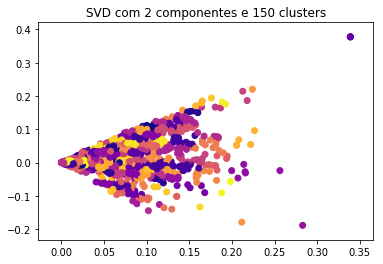

In [23]:
plt.figure()
plt.title('SVD com 2 componentes e 150 clusters')
# for i in range(0, len(truc_data), 5):
plt.scatter(truc_data[:3000, 0], truc_data[:3000, 1], c=label_vectors[:3000], cmap='plasma')

#     plt.scatter(truc_data[i, 0], truc_data[i, 1], color='b', alpha=.6)


## References

Cleaning the data:
https://towardsdatascience.com/another-twitter-sentiment-analysis-bb5b01ebad90

Python remove stop words from pandas dataframe:
https://stackoverflow.com/questions/29523254/python-remove-stop-words-from-pandas-dataframe

=D